In [368]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from IPython.html.widgets import interact

In [369]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


## Neural Network 

The purpose is this project is to explain the basics of neural networks and use one to read handwriting

The Neural Network is a type of program that can trained to perform very complicated functions. It does this by creating a network of "neurons" that can be used to interpret informations. Below is a picture of one such neuron.

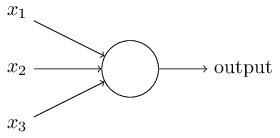

In [370]:
Image('tikz9.png')

Each Neuron has an input vector and weights assigned to each component as well as a bias. It then runs the sum through a Sigmoid funnction 

\begin{align}
\sigma(x) = \frac{1}{1+e^{-x}} \\
Output = \sigma(\vec{w} \cdot \vec{x}+b)
\end{align}

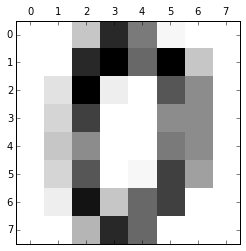

In [371]:
def show_digit(i):
    plt.matshow(digits.images[i],cmap = 'Greys');
    
interact(show_digit, i=(0,100));

In [372]:
def sigm(z):
    return 1/(1+np.e**(-1*z))
sigm_vec = np.vectorize(sigm)

def sigm_prime(z):
    return sigm(z)*(1-sigm(z))
sigm_prime_vec = np.vectorize(sigm_prime)

In [373]:
class Network(object):
    def __init__(self, sizes):
        np.random.seed(0)
        self.sizes = sizes
        self.layers = len(sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self,a):
        for b, w in zip(self.biases, self.weights):
            a = sigm_vec(np.dot(w, a) + b)
        return a
    
    def SGD( self, training_data, epochs, mini_batch_size, eta):
        np.random.seed(0)
        n = len(training_data)
        for j in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
    
    def update_mini_batch(self, mini_batch, eta):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_grad_b, delta_grad_w = self.backprop(x, y)
            grad_b = [nb+dnb for nb, dnb in zip(grad_b, delta_grad_b)]
            grad_w = [nw+dnw for nw, dnw in zip(grad_w, delta_grad_w)]
        self.weights = [w-(eta/len(mini_batch))*gw 
                        for w, gw in zip(self.weights, grad_w)]
        self.biases = [b-(eta/len(mini_batch))*gb 
                       for b, gb in zip(self.biases, grad_b)]
        
    def backprop(self,x,y):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x] 
        zs = [] 
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigm_vec(z)
            activations.append(activation)
        delta = (activations[-1] - y) * sigm_prime_vec(zs[-1])
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)
        for a in range(2, self.layers):
            z = zs[-a]
            spv = sigm_prime_vec(z)
            delta = np.dot(self.weights[-a+1].T, delta) * spv
            grad_b[-a] = delta
            grad_w[-a] = np.dot(delta, activations[-a-1].T)
        return (grad_b, grad_w)
    


In [374]:
def vector(a):
    v = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])
    v[0][a]=1
    return v.T


In [375]:
digits.target[0:700]
training_set = [(np.array([x]).T,np.array([vectorize(y)]).T) for x, y in zip(digits.data[0:700],digits.target[0:700])]


In [376]:
Reader = Network([64,37,10])
Reader.SGD(training_set,70,10,1.5)


In [377]:
right = 0
wrong = 0
for b in np.random.permutation(range(701,1796)):
    a = np.array([digits.data[b]]).T
    if digits.target[b] == np.argmax(Reader.feedforward(a)):
        right += 1
    else:
        wrong +=1
percent = (float(right)/(right+wrong))
print('percent: '+ str(percent))
            


percent: 0.9123287671232877
